# ANN Miranda vs Garcia Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, sys, cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split, KFold

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


In [4]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]

In [5]:
folder="../../../Dataset/Mono/MonoSamples/S-Uniward_5" 
images=os.listdir(folder)
random.shuffle(images)
print(len(images))

40000


In [6]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i])) 
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

192.65962886810303


In [7]:
pd.DataFrame(Garciay).describe()

,0
count,40000.000000
mean,0.500000
std,0.500006
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [8]:
GarciaX.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,23.748546,2.922770,108.869486,850.930925,32.333525,53.566899,26.354008,0.323775,5.909946
std,48.426781,3.231199,97.513623,1530.869495,20.891427,433.382108,14.563884,0.216695,3.029256
min,1.238583,-1.234521,14.475194,84.000000,0.000000,1.721951,1.038634,0.085735,0.894159
25%,3.138806,1.015431,58.775360,249.750000,14.000000,27.551245,14.428205,0.184693,3.541508
50%,6.354816,1.882636,81.303730,392.000000,32.500000,37.205116,25.110028,0.252836,5.620369
75%,16.627832,3.411361,120.700541,747.000000,49.500000,46.192720,37.292377,0.374532,8.000459
max,254.003906,15.906097,1021.998047,16384.000000,90.000000,16384.000000,63.118073,1.419760,16.138912


In [9]:
sc=StandardScaler()

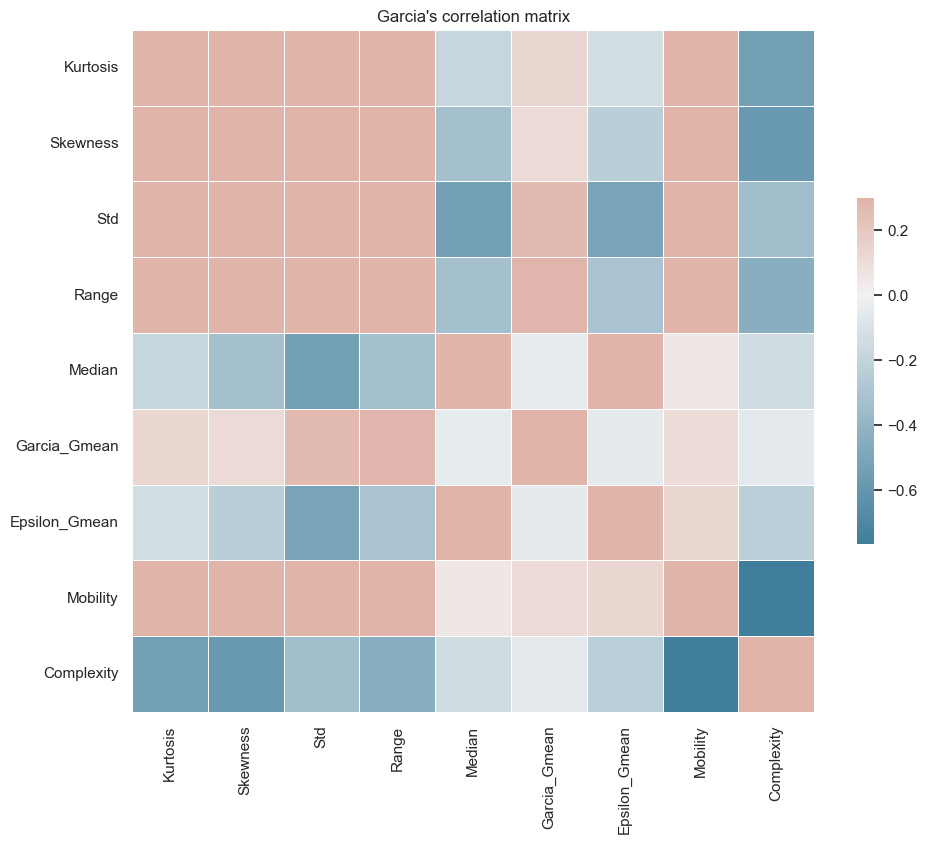

In [10]:
sns.set_theme(style="dark")
corr = GarciaX.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcia's correlation matrix")
plt.show()

In [11]:
kf = KFold(n_splits=5, shuffle=False)
acc_per_fold = []
loss_per_fold = []

#%% Feature Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc.fit_transform(


In [12]:
sc = StandardScaler()
X_Train = sc.fit_transform(GarciaX_train)
X_Test = sc.transform(GarciaX_test)

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(9, activation=tf.nn.relu, input_shape=(9,)),  # input shape required
  tf.keras.layers.Dense(4, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(GarciaX_train, np.array(GarciaY_train,dtype=float), batch_size = 64, epochs = 250)

Epoch 1/250
500/500 [==============================] - 1s 1ms/step - loss: 21.2486 - accuracy: 0.4954
Epoch 2/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.4995
Epoch 3/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.4957
Epoch 4/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4953
Epoch 5/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5011
Epoch 6/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4986
Epoch 7/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 8/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 9/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5021
Epoch 10/250
500/500 [==============================] - 1s 1ms/step - loss: 0.6932 - accur

In [14]:
print(model)
model.evaluate(GarciaX_test, np.array(GarciaY_test))
print(model.metrics_names)
#%% Predicting the Test set results

250/250 [==============================] - 0s 820us/step - loss: 0.6933 - accuracy: 0.5017
['loss', 'accuracy']


In [15]:
from sklearn import metrics

In [16]:
y_pred = (model.predict(GarciaX_test) > 0.5)
#%% Making the Confusion Matrix
cm = metrics.confusion_matrix(GarciaY_test, y_pred)
print("Confusion matrix\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity :', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity :', specificity)
#%% 
print("Precision",metrics.precision_score(GarciaY_test, y_pred, average=None))
print("Accuracy",metrics.accuracy_score(GarciaY_test, y_pred))
print("F1",metrics.f1_score(GarciaY_test, y_pred, average=None))

Confusion matrix
 [[4014    2]
 [3984    0]]
Sensitivity : 0.9995019920318725
Specificity : 0.0
Precision [0.50187547 0.        ]
Accuracy 0.50175
F1 [0.66822041 0.        ]


In [17]:
fallas=np.array(labels,dtype='<U256')
y_pred=y_pred.reshape(len(y_pred))
print(np.shape(y_pred))
print(np.shape(Y_Test))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Test[i]>0.5):
        fallas=np.vstack((fallas,testDataset.iloc[i].to_numpy()))

y_pred = (model.predict(X_Train) > 0.5).reshape(len(X_Train))
for i in range(len(y_pred)):
    if(y_pred[i]!=Y_Train[i]>0.5):
        fallas=np.vstack((fallas,trainDataset.iloc[i].to_numpy()))

asd="fallasEval.csv"
print("Fallas",len(fallas))
np.savetxt(asd,fallas,delimiter=",", fmt="%s")

NameError: name 'labels' is not defined